In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # matplotlib의 확장판이라고 생각하자. matplotlib도 불러와야함

In [35]:
passengers = pd.read_csv('train.csv')
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
# 데이터 컬럼 타입 확인
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
# NULL값 대체
passengers['Age'].fillna(passengers['Age'].mean(), inplace=True)
passengers['Cabin'].fillna('N', inplace=True)
passengers['Embarked'].fillna('N', inplace=True)

print("NULL값 : ", passengers.isnull().sum().sum())

NULL값 :  0


In [38]:
# feature 확인
print('Sex\n', passengers['Sex'].value_counts())
print('\nCabin\n', passengers['Cabin'].value_counts())
print('\nEmbarked\n', passengers['Embarked'].value_counts())

Sex
 male      577
female    314
Name: Sex, dtype: int64

Cabin
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [39]:
# Cabin은 첫 번째 알파벳으로 수정
passengers['Cabin'] = passengers['Cabin'].str[:1]
passengers['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [40]:
# 성별에 따른 생존 확률 확인
passengers.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

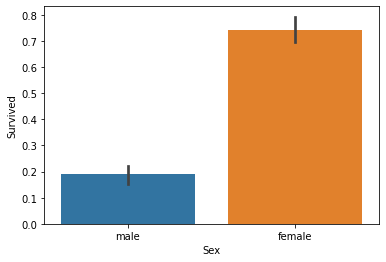

In [42]:
# 성별에 따른 생존 확률 그래프로 확인
sns.barplot(x='Sex', y='Survived', data=passengers)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

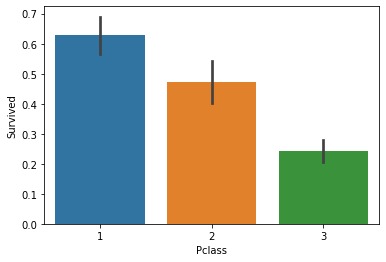

In [48]:
# 빈부에 따른 생존 확률 그래프로 확인
sns.barplot(x='Pclass', y='Survived', data=passengers)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

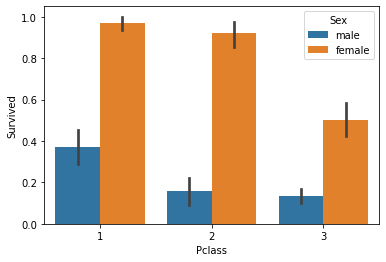

In [50]:
# 빈부에 따른 남녀 생존 확률 그래프로 확인
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=passengers)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

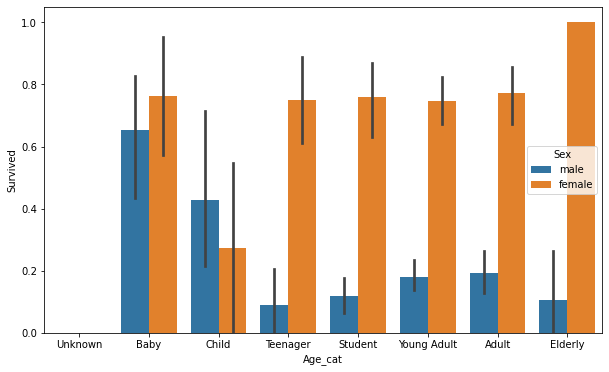

In [61]:
# 나이대 구분 함수
def get_age(age):
    ret = ''
    
    if age <= -1:
        ret = 'Unknown'
    elif age <= 5:
        ret = 'Baby'
    elif age <= 12:
        ret = 'Child'
    elif age <= 18:
        ret = 'Teenager'
    elif age <= 25:
        ret = 'Student'
    elif age <= 35:
        ret = 'Young Adult'
    elif age <= 60:
        ret = 'Adult'
    else:
        ret = 'Elderly'
    
    return ret

# 그래프의 크기 figure 설정
plt.figure(figsize=(10,6))

# x축 값 표시
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 함수 사용
# get_age(x)의 파라미터로 passengers['Age']의 컬럼 값을 받아와서 알맞는 리턴 값 반환
passengers['Age_cat'] = passengers['Age'].apply(lambda x : get_age(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = passengers, order = group_names)
passengers.drop('Age_cat', axis = 1, inplace = True)